# ảnh mặt trăng sau lọc thông thấp Gauss

<>:6: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Home\AppData\Local\Temp\ipykernel_13196\595417153.py:6: SyntaxWarning: invalid escape sequence '\I'
  img = Image.open("C:\ImageProcessing\Doan-xulyanh\img\moon.jpg").convert("L")  # doc anh va chuyen sang muc xam


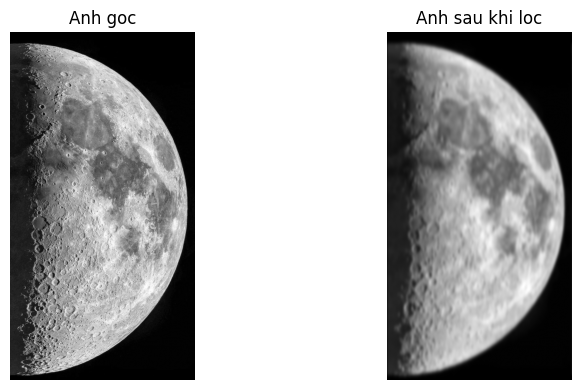

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# === 1️⃣ Doc anh goc ===
img = Image.open("C:\ImageProcessing\Doan-xulyanh\img\moon.jpg").convert("L")  # doc anh va chuyen sang muc xam
f = np.array(img)
P, Q = f.shape

# === 2️⃣ Tao bo loc thong thap Gauss trong mien tan so ===
sigma = 30  # do lech chuan
u = np.arange(P) - P/2
v = np.arange(Q) - Q/2
U, V = np.meshgrid(u, v, indexing="ij")
D2 = U**2 + V**2
H = np.exp(-D2 / (2 * sigma**2))  # bo loc Gauss

# === 3️⃣ Bien doi FFT va ap dung bo loc ===
F = np.fft.fft2(f)
F_shift = np.fft.fftshift(F)
G = H * F_shift  # nhan voi bo loc
G_ishift = np.fft.ifftshift(G)
g = np.fft.ifft2(G_ishift)
g = np.abs(g)

# === 4️⃣ Hien thi ket qua ===
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(f, cmap="gray")
plt.title("Anh goc")
plt.axis("off")


plt.subplot(1, 3, 2)
plt.imshow(g, cmap="gray")
plt.title("Anh sau khi loc")
plt.axis("off")

plt.tight_layout()
plt.show()
